<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/kalman/Kalman_Filters_for_Nifty_ema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install pykalman
!pip install yfinance
!pip install pandas-ta==0.2.45b
!pip install ffn

In [42]:
#Importing dependencies#
from pykalman import KalmanFilter
import numpy as np
import pylab as pl
import pandas as pd
import yfinance as yf
from scipy import poly1d
from datetime import datetime
import pandas_ta as ta
import matplotlib.pyplot as plt
import ffn
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

[*********************100%***********************]  1 of 1 completed


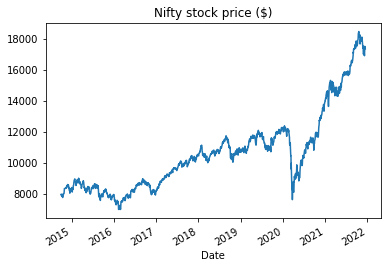

In [43]:
nifty_df = yf.download('^nsei',start='2014-10-01') # 2018
nifty_df['Adj Close'].plot(title='Nifty stock price ($)');

In [44]:
#nifty_df = yf.download('sbin.ns',start='2014-01-01',progress=False)


In [45]:
df = nifty_df[['Adj Close']]


mean 16243.960502250502


Text(0.5, 0, 'Days')

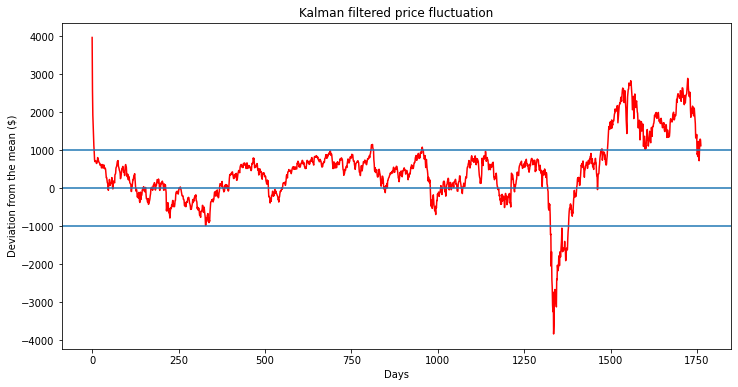

In [46]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean, cov = f.filter(df['Adj Close'].values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
print(f'mean {mean[-1]}')

plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].values - mean, 'red', lw=1.5)

plt.axhline(y=0)
plt.axhline(y=1000)
plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation")
plt.ylabel("Deviation from the mean ($)")
plt.xlabel("Days")

In [47]:
df.tail(2)

,Adj Close
Date,
2021-12-10,17511.300781
2021-12-13,17368.250000


In [48]:
spread= pd.DataFrame({'Date':df.index,'spread':(df['Adj Close'].values - mean)})

In [49]:
spread=spread.set_index('Date')

In [50]:
df_new=pd.concat([df,spread['spread']],axis=1)


In [51]:
df_new['30 Day MA'] = df_new['spread'].rolling(window=50).mean()
# set .std(ddof=0) for population std instead of sample
df_new['30 Day STD'] = df_new['spread'].rolling(window=50).std() 
df_new['Upper Band'] = df_new['30 Day MA'] + (df_new['30 Day STD'] *2)
df_new['Lower Band'] = df_new['30 Day MA'] - (df_new['30 Day STD'] *2)
df_new['boll_percent'] = (df_new['spread']-df_new['Lower Band'])/(df_new['Upper Band']-df_new['Lower Band'])

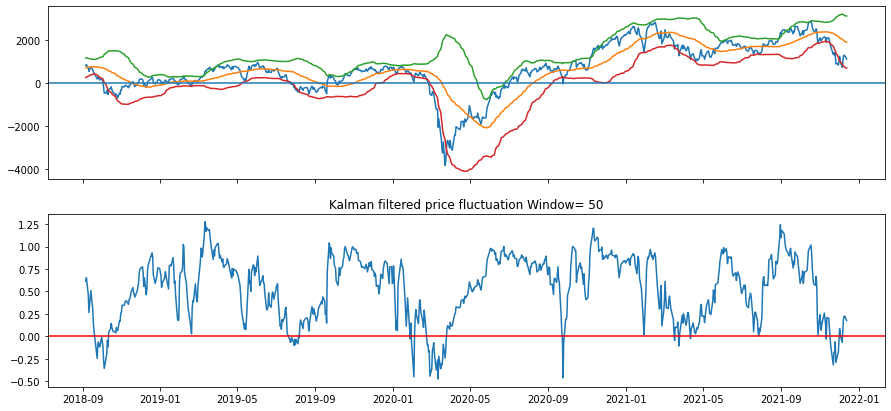

In [52]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex=True)
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[0].plot(df_new[['spread','30 Day MA','Upper Band','Lower Band']][-800:])
ax[0].axhline(y=0)
#plt.axhline(y=1000)
#plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation Window= 50")
#ax[0].ylabel("Deviation from the mean ($)")
#ax[0].xlabel("Days")
ax[1].plot(df_new[['boll_percent']][-800:])
ax[1].axhline(y=0,color='r')
plt.show()

In [53]:
df_new['30 Day MA'] = df_new['spread'].rolling(window=20).mean()
# set .std(ddof=0) for population std instead of sample
df_new['30 Day STD'] = df_new['spread'].rolling(window=20).std() 
df_new['Upper Band'] = df_new['30 Day MA'] + (df_new['30 Day STD'] *2)
df_new['Lower Band'] = df_new['30 Day MA'] - (df_new['30 Day STD'] *2)
df_new['boll_percent'] = (df_new['spread']-df_new['Lower Band'])/(df_new['Upper Band']-df_new['Lower Band'])

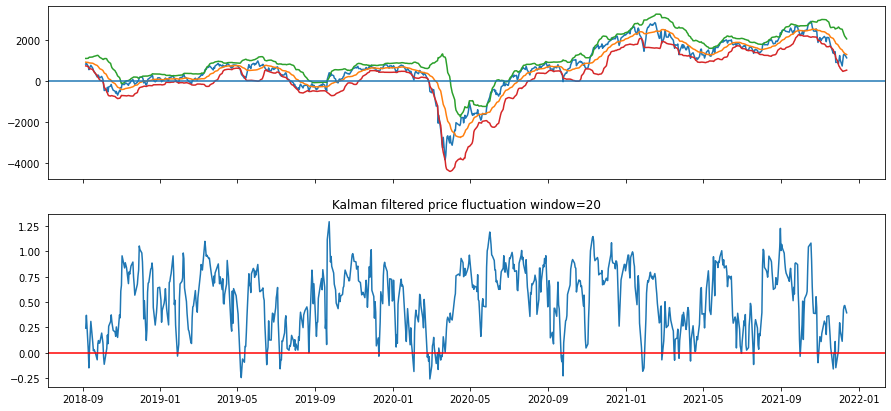

In [54]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex=True)
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[0].plot(df_new[['spread','30 Day MA','Upper Band','Lower Band']][-800:])
ax[0].axhline(y=0)
#plt.axhline(y=1000)
#plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation window=20")
#ax[0].ylabel("Deviation from the mean ($)")
#ax[0].xlabel("Days")
ax[1].plot(df_new[['boll_percent']][-800:])
ax[1].axhline(y=0,color='r')
plt.show()

In [55]:
nifty =pd.DataFrame({'Date': nifty_df.index,'Close':df['Adj Close'].values - mean})


In [56]:
nifty['30 Day MA'] = nifty['Close'].rolling(window=20).mean()
# set .std(ddof=0) for population std instead of sample
nifty['30 Day STD'] = nifty['Close'].rolling(window=20).std() 
nifty['Upper Band'] = nifty['30 Day MA'] + (nifty['30 Day STD'] *0.5)
nifty['Lower Band'] = nifty['30 Day MA'] - (nifty['30 Day STD'] *0.5)

nifty.ta.macd(fast=26,slow=50,signal=18, append=True)

print()

In [57]:
nifty=nifty.set_index('date')

In [58]:
nifty.tail(2)

,close,30 Day MA,30 Day STD,Upper Band,Lower Band,MACD_26_50_18,MACDh_26_50_18,MACDs_26_50_18
date,,,,,,,,
2021-12-10,1278.639529,1335.420854,419.907768,1545.374738,1125.466970,-264.923755,-83.792675,-181.131079
2021-12-13,1124.289498,1285.773668,379.346887,1475.447111,1096.100224,-265.705970,-75.672270,-190.033699


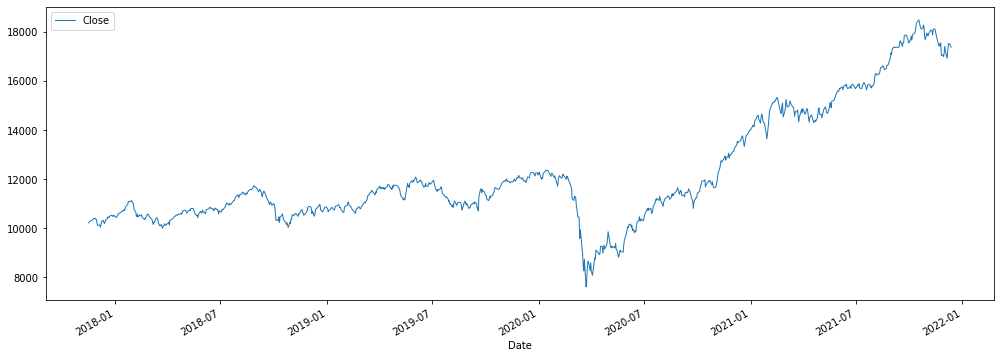

In [59]:
nifty_df[['Close']][-1000:].plot(figsize=(17,6),linewidth=1);

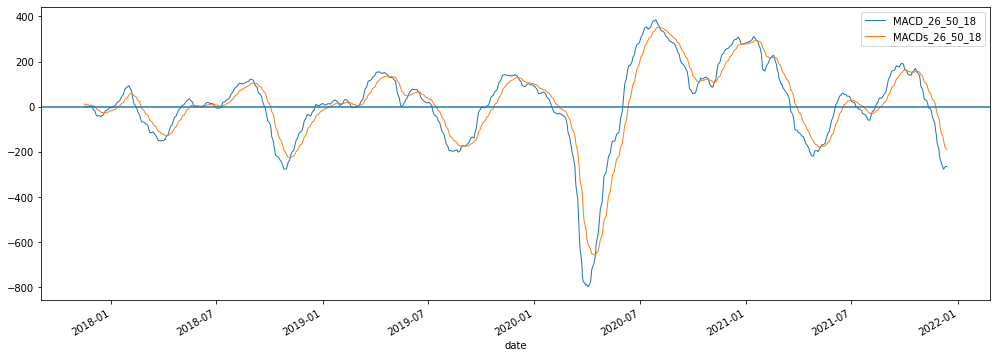

In [60]:
nifty[['MACD_26_50_18','MACDs_26_50_18']][-1000:].plot(figsize=(17,6),linewidth=1);
plt.axhline(y=0);

In [61]:
nifty['slope']=abs(nifty['MACD_26_50_18'].diff(5))
nifty['slope']=np.where(nifty['slope']<=10,0,nifty['slope'])
nifty['slope_s']=abs(nifty['MACDs_26_50_18'].diff(5))
nifty['slope_s']=np.where(nifty['slope_s']<=10,0,nifty['slope_s'])

In [62]:
nifty_df['Buy_ind'] = np.where((nifty['slope_s']>0), 1, 0)
#nifty['Sell_ind'] = np.where((nifty['slope_s']==-1), 0, 1)

In [63]:
nifty_df.Close.tail(1)

Date
2021-12-13    17368.25
Name: Close, dtype: float64

In [64]:
l=-600

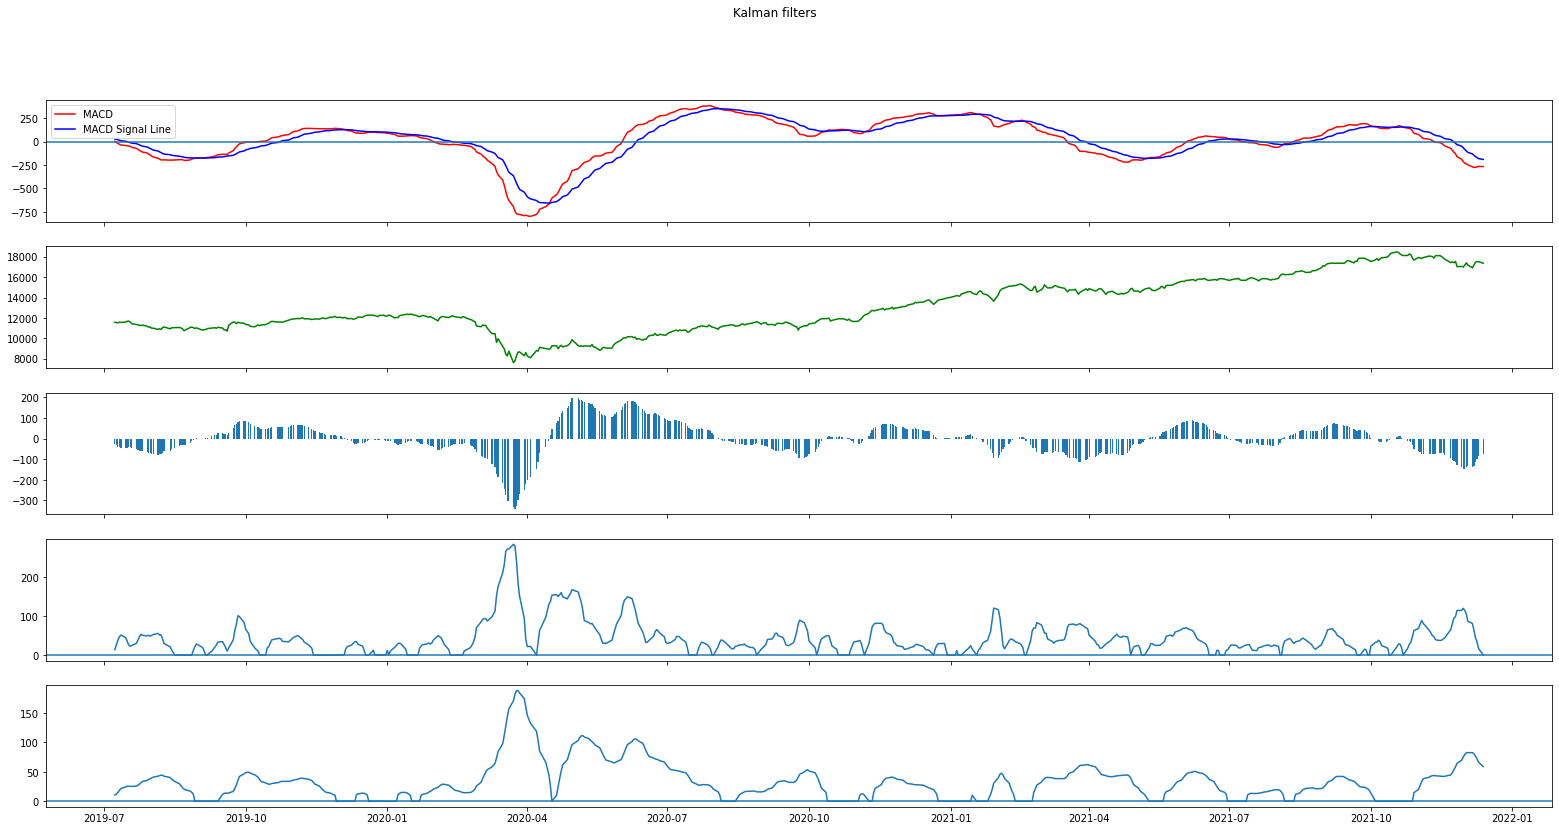

In [65]:
fig, ax = plt.subplots(5,1,figsize=(27,13),linewidth=1,sharex=True)
ax[0].plot(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACD_26_50_18'][l:],'r', label='MACD')
ax[0].plot(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACDs_26_50_18'][l:],'b', label='MACD Signal Line')
ax[2].bar(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACDh_26_50_18'][l:], label='MACD Signal Line')
ax[1].plot(nifty_df.loc[:, :].index[l:], nifty_df.loc[:, 'Close'][l:],'g', label='NH moving avg 50 days')
#ax[1].scatter(nifty_df.loc[nifty_df['Buy_ind'] ==1,:].index[l:],nifty_df.loc[nifty_df['Buy_ind'] ==1,'Close'][l:] ,marker="*")
ax[3].plot(nifty.iloc[:, :].index[l:], nifty.loc[:, 'slope'][l:], label='Slope')
ax[4].plot(nifty.iloc[:, :].index[l:], nifty.loc[:, 'slope_s'][l:], label='Slope')
plt.suptitle('Kalman filters')
ax[0].axhline(y=0)
ax[3].axhline(y=0)
ax[4].axhline(y=0)
ax[0].legend(loc='upper left')
plt.show()


In [66]:
l=-1600
m=-1000

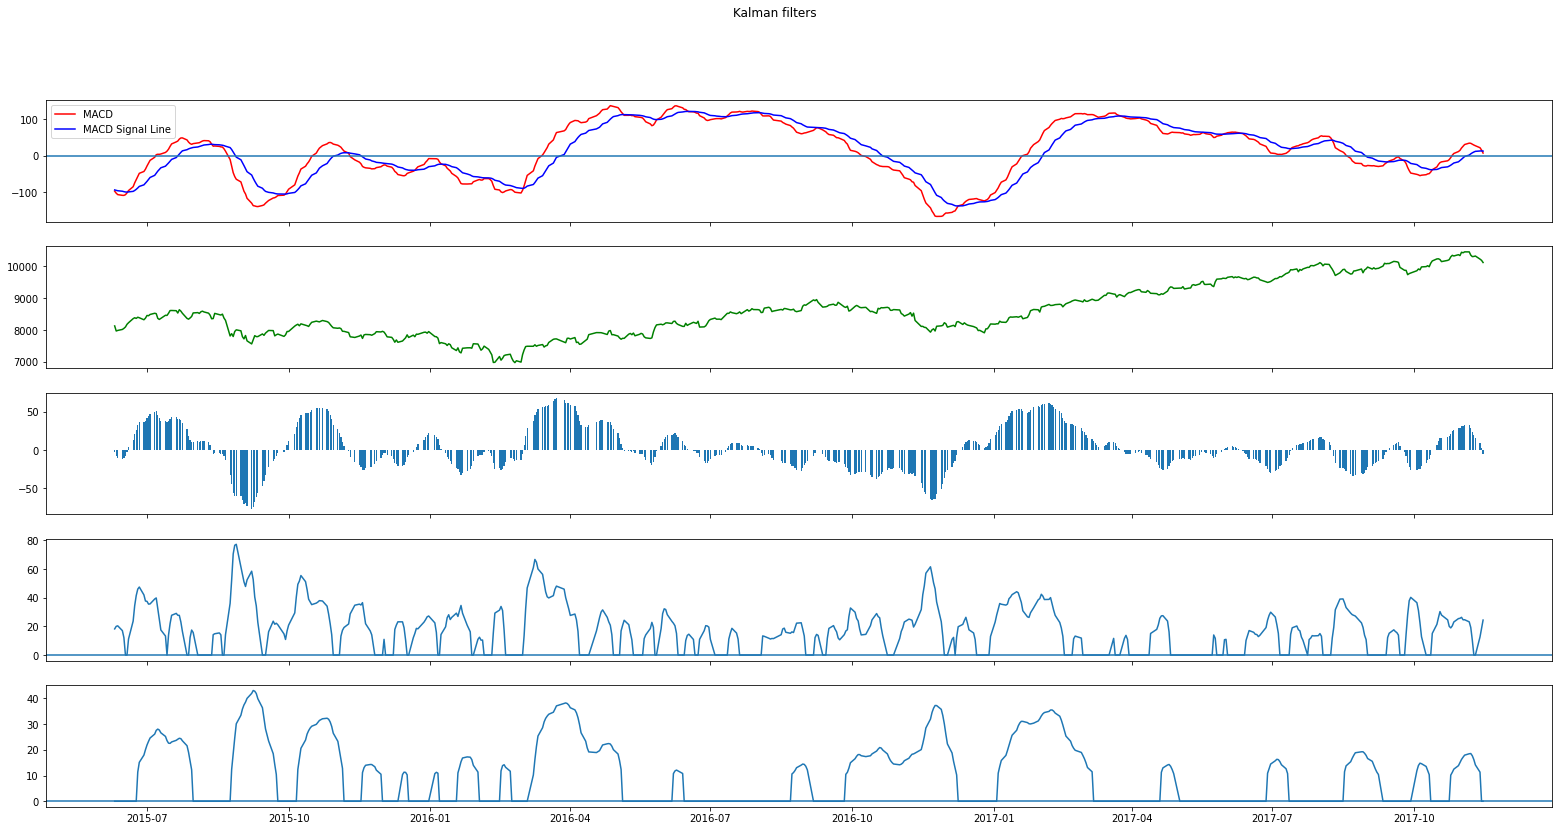

In [67]:
fig, ax = plt.subplots(5,1,figsize=(27,13),linewidth=1,sharex=True)
ax[0].plot(nifty.loc[:, :].index[l:m], nifty.loc[:, 'MACD_26_50_18'][l:m],'r', label='MACD')
ax[0].plot(nifty.loc[:, :].index[l:m], nifty.loc[:, 'MACDs_26_50_18'][l:m],'b', label='MACD Signal Line')
ax[2].bar(nifty.loc[:, :].index[l:m], nifty.loc[:, 'MACDh_26_50_18'][l:m], label='MACD Signal Line')
ax[1].plot(nifty_df.loc[:, :].index[l:m], nifty_df.loc[:, 'Close'][l:m],'g', label='NH moving avg 50 days')
#ax[1].scatter(nifty_df.loc[nifty_df['Buy_ind'] ==1,:].index[l:],nifty_df.loc[nifty_df['Buy_ind'] ==1,'Close'][l:] ,marker="*")
ax[3].plot(nifty.iloc[:, :].index[l:m], nifty.loc[:, 'slope'][l:m], label='Slope')
ax[4].plot(nifty.iloc[:, :].index[l:m], nifty.loc[:, 'slope_s'][l:m], label='Slope')
plt.suptitle('Kalman filters')
ax[0].axhline(y=0)
ax[3].axhline(y=0)
ax[4].axhline(y=0)
ax[0].legend(loc='upper left')
plt.show()


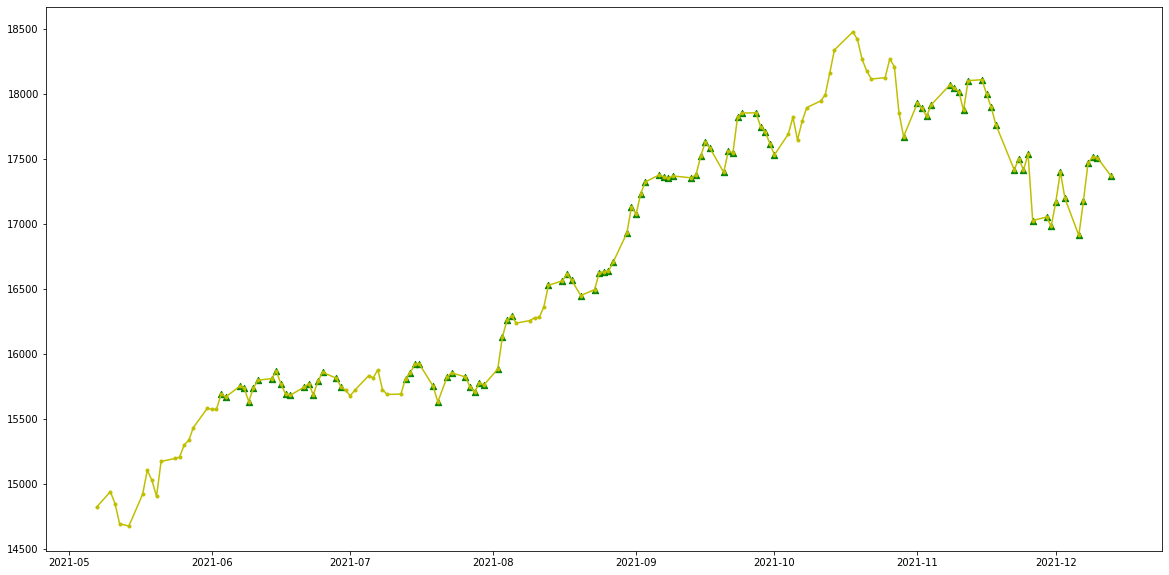

In [68]:
plt.figure(figsize=(20,10))
plt.plot(nifty_df.loc[:, :].index[-150:], nifty_df.loc[:, 'Close'][-150:],'y',marker='.')
plt.scatter(nifty_df.loc[nifty_df['Buy_ind'] ==1,:].index[-100:],nifty_df.loc[nifty_df['Buy_ind'] ==1,'Close'][-100:] ,marker="^",color='g',s=40)
#plt.scatter(nifty_df.loc[nifty_df['Buy_ind'] ==0,:].index[-1000:],nifty_df.loc[nifty_df['Buy_ind'] ==0,'Close'][-1000:] ,marker=".")

plt.show()

In [69]:
nifty.tail(1)

,close,30 Day MA,30 Day STD,Upper Band,Lower Band,MACD_26_50_18,MACDh_26_50_18,MACDs_26_50_18,slope,slope_s
date,,,,,,,,,,
2021-12-13,1124.289498,1285.773668,379.346887,1475.447111,1096.100224,-265.70597,-75.67227,-190.033699,0.0,59.081921


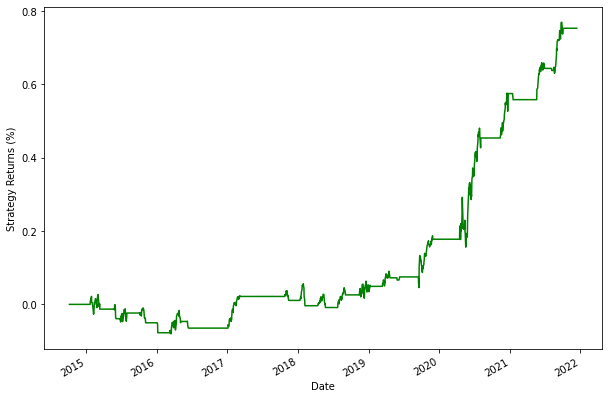

sharpe ratio :  0.03612444588423015
sortino ratio :  0.34630326437957326


In [70]:
nifty['sig']=np.where(nifty['MACDh_26_50_18']>0,1,-1)
nifty['sigs']=np.where(nifty['slope_s']>0,1,-1)
nifty['sigl']=nifty['sig']+nifty['sigs']
nifty['signals']=np.where(nifty['sigl']==2,1,0)
#nifty['signals']=np.where(nifty['sigl']==,1,nifty.signals)
# Calculate daily returns
nifty['Return'] = nifty_df.Close.pct_change()
 
# Calculate strategy returns
nifty['Strategy_F'] = nifty.Return * nifty.signals.shift(1)

# Calculate geometric returns
geometric_returns = ((nifty.Strategy_F+1).cumprod()-1)
#np.sum(np.log(data/data.shift())*portfolio, axis=1)
# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
volatility = geometric_returns.std() * np.sqrt(252)
sharpe_ratio = (geometric_returns.mean() - 0.05/252) / volatility 
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()
print('sharpe ratio : ' ,sharpe_ratio)
std_neg = geometric_returns[geometric_returns<0].std()*np.sqrt(252)
sortino_ratio=(geometric_returns.mean() - 0.05/252)/std_neg
print('sortino ratio : ' , sortino_ratio) 

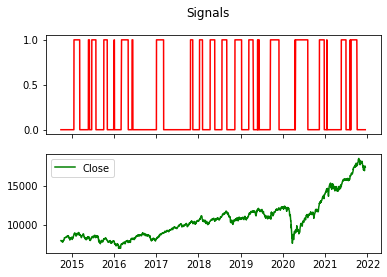

In [71]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'signals'],'r', label='Signals')
ax[1].plot(df.loc[:, :].index, df.loc[:, 'Adj Close'],'g', label='Close')
#ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('Signals')
ax[1].legend()
plt.show()


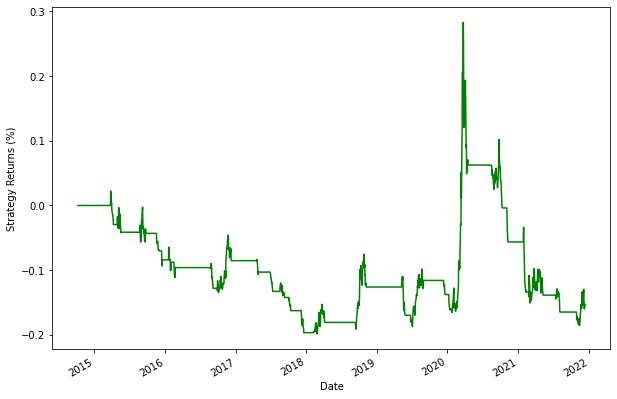

sharpe ratio :  -0.08285606347961191
sortino ratio :  -0.1283508693081678


In [72]:
nifty['sig_s']=np.where(nifty['MACDh_26_50_18']<0,-1,1)
nifty['sigs_s']=np.where(nifty['slope_s']>0,-1,1)
nifty['sigl_s']=nifty['sig_s']+nifty['sigs_s']
nifty['signals_s']=np.where(nifty['sigl_s']==-2,-1,0)
#nifty['signals']=np.where(nifty['sigl']==,1,nifty.signals)
# Calculate daily returns
nifty['Return'] = nifty_df.Close.pct_change()
 
# Calculate strategy returns
nifty['Strategy_F'] = nifty.Return * nifty.signals_s.shift(1)

# Calculate geometric returns
geometric_returns = ((nifty.Strategy_F+1).cumprod()-1)
#np.sum(np.log(data/data.shift())*portfolio, axis=1)
# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
volatility = geometric_returns.std() * np.sqrt(252)
sharpe_ratio = (geometric_returns.mean() - 0.05/252) / volatility 
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()
print('sharpe ratio : ' ,sharpe_ratio)
std_neg = geometric_returns[geometric_returns<0].std()*np.sqrt(252)
sortino_ratio=(geometric_returns.mean() - 0.05/252)/std_neg
print('sortino ratio : ' , sortino_ratio) 

In [73]:
stats = geometric_returns.calc_stats()  # use .calc_stats() on a series to invoke ffn.
stats.display()

Stats for Strategy_F from 2014-10-01 00:00:00 - 2021-12-13 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
-               -         inf%    -993.50%

Annualized Returns:
mtd     3m      6m      ytd      1y       3y     5y      10y    incep.
------  ------  ------  -------  -------  -----  ------  -----  --------
15.35%  -7.13%  10.40%  171.45%  171.45%  6.66%  12.40%  -      inf%

Periodic:
        daily     monthly    yearly
------  --------  ---------  --------
sharpe  -         -          -
mean    inf%      inf%       -inf%
vol     -         -          -
skew    -         -          -
kurt    -         -          -
best    inf%      inf%       171.45%
worst   -291.19%  -545.50%   -inf%

Drawdowns:
max       avg         # days
--------  --------  --------
-993.50%  -254.24%     522.8

Misc:
---------------  -------
avg. up month    inf%
avg. down month  -23.90%
up year %       

In [74]:
stats.stats

start                    2014-10-01 00:00:00
end                      2021-12-13 00:00:00
rf                                         0
total_return                             NaN
cagr                                     inf
max_drawdown                        -9.93502
calmar                                   inf
mtd                                 0.153542
three_month                       -0.0713219
six_month                           0.103955
ytd                                  1.71454
one_year                             1.71454
three_year                         0.0666128
five_year                           0.123957
ten_year                                 NaN
incep                                    inf
daily_sharpe                             NaN
daily_sortino                            inf
daily_mean                               inf
daily_vol                                NaN
daily_skew                               NaN
daily_kurt                               NaN
best_day  

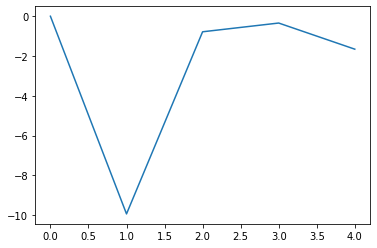

In [75]:
stats.drawdown_details['drawdown'].plot();

In [76]:
stats.display_monthly_returns()

  Year     Jan     Feb      Mar      Apr     May    Jun     Jul     Aug     Sep  Oct          Nov    Dec  YTD
------  ------  ------  -------  -------  ------  -----  ------  ------  ------  -------  -------  -----  ------
  2014    0       0        0        0       0      0       0       0       0     -           0      0     -
  2015    0       0      inf     -545.5   140.09   0       0      27.7   -18.32  0.00       57.55  23.58  -inf
  2016   19.66   -4.5      0        0       0      0       0      16.79    5.74  3.06      -34.02   5.78  1.51
  2017    0       0        0       19.6     0.92   2.72   25.65    1.21    5.77  14.31       0     20.9   130.47
  2018    0      -2.5    -15.15    11.17    0      0       0       0     -17.82  -27.35     16.79   0     -35.87
  2019    0       0        0        0      34.63   3.76  -27.58   -9.14    0     0.00        0     18.82  9.21
  2020    5.84  -37.7   -237.15   -49.79    0      0       0     -23.49   20.63  -106.64  1370.27   0     -59.